In [4]:
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['font.family'] = 'sans-serif'

In [13]:
df_part_0 = pd.read_csv('../results/learningcurve/learningurve_run_2020_06_09_12_43_1591699424.csv')
df_part_1 = pd.read_csv('../results/learningcurve/learningurve_run_2020_06_09_13_02_1591700567.csv')
df_part_2 = pd.read_csv('../results/learningcurve/learningurve_run_2020_06_09_14_08_1591704482.csv')

In [14]:
df_lc = pd.concat([df_part_0, df_part_1, df_part_2])

In [19]:
groupd_df = df_lc.groupby('ts_size').agg(['mean', 'std'])

In [25]:
groupd_df['r2']['mean'].index

Int64Index([10, 20, 50, 100, 200, 500, 1000, 2000, 3000, 5000, 5600], dtype='int64', name='ts_size')

In [29]:
groupd_df

Unnamed: 0                 r2                 mae                 mse  \
              mean      std      mean       std      mean       std      mean   
ts_size                                                                         
10             4.5  3.02765 -0.422976  0.092454  0.278271  0.010349  0.199942   
20            14.5  3.02765 -0.424201  0.087694  0.276038  0.005903  0.200044   
50            24.5  3.02765 -0.209780  0.175660  0.278639  0.010235  0.170091   
100           34.5  3.02765  0.137576  0.070151  0.248285  0.009704  0.124398   
200            4.5  3.02765  0.213122  0.013157  0.230937  0.010643  0.112982   
500           14.5  3.02765  0.322668  0.021911  0.202436  0.004102  0.096947   
1000          24.5  3.02765  0.376820  0.009105  0.189176  0.003603  0.089344   
2000          34.5  3.02765  0.444681  0.011543  0.169746  0.002958  0.079718   
3000           4.5  3.02765  0.473149  0.014768  0.161707  0.003199  0.075669   
5000          14.5  3.02765  0.514557  0.007052  0.150177  0.001659  0.069789   
5600          24.5  3.02765  0.515713  0.006712  0.148683  0.001133  0.069680   

                       mdae           median_delta_e           mean_delta_e  \
              std      mean       std           mean       std         mean   
ts_size                                                                       
10       0.013619  0.071699  0.039814      30.176170  3.792219    29.785398   
20       0.012702  0.062908  0.019775      28.055869  1.604125    28.056590   
50       0.024348  0.141653  0.067554      29.801705  1.615707    33.106687   
100      0.010733  0.159590  0.029002      25.646554  2.012378    30.026323   
200      0.002125  0.144207  0.026316      24.084372  1.655071    28.270689   
500      0.003092  0.113213  0.007625      20.765971  0.769440    25.120074   
1000     0.001413  0.099398  0.006708      18.695154  1.179383    23.278901   
2000     0.001683  0.077376  0.005676      16.279464  1.031982    20.977069   
3000     0.002070  0.068124  0.004121      14.995463  0.892342    20.140637   
5000     0.001042  0.057922  0.003550      13.235067  0.653164    18.735376   
5600     0.000955  0.054660  0.001463      12.985705  0.564194    18.554491   

                  iteration           
              std      mean      std  
ts_size                               
10       5.659800       4.5  3.02765  
20       2.472404       4.5  3.02765  
50       3.947774       4.5  3.02765  
100      1.394512       4.5  3.02765  
200      1.266268       4.5  3.02765  
500      0.522814       4.5  3.02765  
1000     0.536223       4.5  3.02765  
2000     0.427535       4.5  3.02765  
3000     0.427512       4.5  3.02765  
5000     0.379459       4.5  3.02765  
5600     0.200999       4.5  3.02765

/Users/kevinmaikjablonka/opt/miniconda3/envs/colorml2/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  del sys.path[0]
/Users/kevinmaikjablonka/opt/miniconda3/envs/colorml2/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  


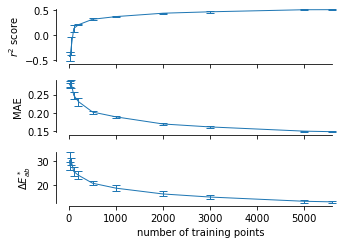

In [47]:
fig, ax = plt.subplots(3,1, figsize=(5,3.5), sharex=True)

ax[0].errorbar(groupd_df['r2']['mean'].index, groupd_df['r2']['mean'].values, 
               yerr=groupd_df['r2']['std'].values, capsize=4, lw=1)
ax[1].errorbar(groupd_df['mae']['mean'].index, groupd_df['mae']['mean'].values, 
              yerr=groupd_df['mae']['std'].values, capsize=4, lw=1)
ax[2].errorbar(groupd_df['median_delta_e']['mean'].index, groupd_df['median_delta_e']['mean'].values, 
              yerr=groupd_df['median_delta_e']['std'].values, capsize=4, lw=1)

for a in ax:
    a.spines['top'].set_color('none')
    a.spines['right'].set_color('none')
    a.spines['left'].set_smart_bounds(True)
    a.spines['bottom'].set_smart_bounds(True)

ax[0].set_ylabel(r'$r^2$ score')
ax[1].set_ylabel(r'MAE')
ax[2].set_ylabel(r'$\Delta E^*_{ab}$')
ax[2].set_xlabel('number of training points')

fig.tight_layout()

fig.savefig('../results/learningcurve.pdf', bbox_inches='tight')

/Users/kevinmaikjablonka/opt/miniconda3/envs/colorml2/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  del sys.path[0]
/Users/kevinmaikjablonka/opt/miniconda3/envs/colorml2/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  


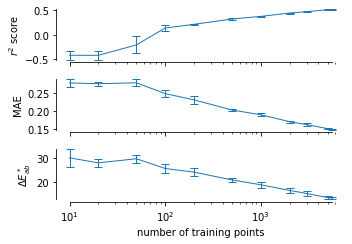

In [50]:
fig, ax = plt.subplots(3,1, figsize=(5,3.5), sharex=True)

ax[0].errorbar(groupd_df['r2']['mean'].index, groupd_df['r2']['mean'].values, 
               yerr=groupd_df['r2']['std'].values, capsize=4, lw=1)
ax[1].errorbar(groupd_df['mae']['mean'].index, groupd_df['mae']['mean'].values, 
              yerr=groupd_df['mae']['std'].values, capsize=4, lw=1)
ax[2].errorbar(groupd_df['median_delta_e']['mean'].index, groupd_df['median_delta_e']['mean'].values, 
              yerr=groupd_df['median_delta_e']['std'].values, capsize=4, lw=1)

for a in ax:
    a.spines['top'].set_color('none')
    a.spines['right'].set_color('none')
    a.spines['left'].set_smart_bounds(True)
    a.spines['bottom'].set_smart_bounds(True)
    a.set_xscale('log')
    #a.set_yscale('log')

ax[0].set_ylabel(r'$r^2$ score')
ax[1].set_ylabel(r'MAE')
ax[2].set_ylabel(r'$\Delta E^*_{ab}$')
ax[2].set_xlabel('number of training points')

fig.tight_layout()

fig.savefig('../results/learningcurve_log.pdf', bbox_inches='tight')